<table>
    <tr>
        <td style="text-align:left">
            <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR9ItLTT_F-3Q30cu7ZCCoKmuFGBt22pe7pNA" alt="Logo Universidad" width="300"/>
        </td>
        <td>
            Departamento de Ciencias de la Computación y de la Decisión<br>
            Facultad de Minas<br>
            Universidad Nacional de Colombia<br>
            Optimizacion e IA 2024-2S<br><br>
            Docente: Maria Constanza Torres Madronero<br>
            <br>
            Contribuciones a la guia por: <br>
            - Deimer Miranda Montoya (2023)<br>
            - Luis Fernando Becerra Monsalve (2024)
        </td>    
        </td>    
    </tr>
</table>

### Optimización de funciones

Vamos a comparar el desempeño de los optimizadores gradiente descendente, algoritmo genético, enjambre de partículas y colonia de hormigas. Para ello usaremos una función no convexa con la cual trabajamos en la Practica 1.


In [36]:
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
from matplotlib import cm

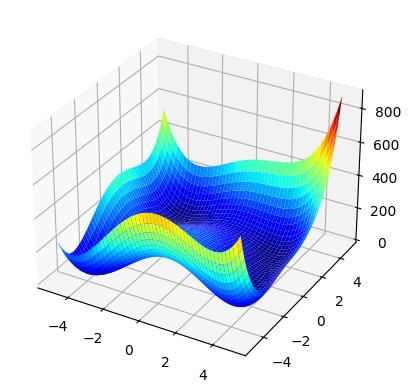

In [37]:
#Minimizacion de una funcion 2D
#f(x,y)=(x^2+y-11)^2+(x+y^2-7)^2
def objective_func(solution):
  term1 = (solution[0]**2+solution[1]-11)**2
  term2 = (solution[0]+solution[1]**2-7)**2
  return term1+term2

#Grafica de la funcion
x = np.linspace(-5, 5, 1000)
y = np.linspace(-5, 5, 1000)
xv, yv = np.meshgrid(x, y)
feval = objective_func([xv,yv])
ax = plt.figure().add_subplot(111,projection='3d')
ax.plot_surface(xv, yv, feval, cmap=cm.jet)

### Gradiente descendiente

In [38]:
#Funcion que evalua el gradiente en un punto solucion
def derivative(X):
  x = X[0]
  y = X[1]
  term0 = 4*x**3+4*x*y-42*x+2*y**2-14
  term1 = 2*x**2+4*x*y+4*y**3-26*y-22
  gradiente = np.array([term0,term1])
  return gradiente

In [39]:
#Funcion del gradiente descendente
def gradient_descent(objective_func, derivative, bounds, n_iter, step_size):
  # Generamos el punto inicial de forma aleatoria
  solution0 = bounds[:,0]+rand(len(bounds))*(bounds[:,1]-bounds[:,0])
  solution1 = bounds[:,0]+rand(len(bounds))*(bounds[:,1]-bounds[:,0])
  solution = np.array([solution0,solution1])
	# Algoritmo iterativo
  for i in range(n_iter):
		#1. Calculo del gradiente
    gradiente = derivative(solution)
		#2. Actualizacion de la solucion
    solution = solution - step_size*gradiente
  	#3. Evaluacion de la solucion
    solution_eval = objective_func(solution)
    #print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
  return solution

[7.88860905e-31]


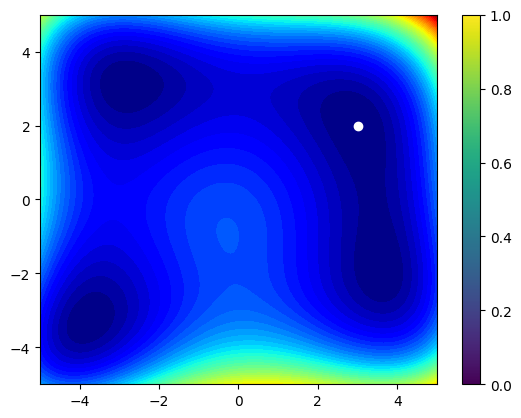

In [40]:
# Aplicacion del gradiente
bounds = np.asarray([[-4.0, 4.0]])
n_iter = 500
step_size = 0.01
solution = gradient_descent(objective_func, derivative, bounds, n_iter, step_size)
#Guardamos la solucion para la comparacion
xopGD, yopGD = solution
fevalGD = objective_func(solution)

#Grafica de los contornos y punto optimo
plt.contourf(xv, yv, feval, levels=50, cmap='jet')
plt.scatter(xopGD, yopGD,c='white',marker='o')
plt.colorbar()
print(fevalGD)

### Algoritmos Geneticos

In [41]:
!pip install pygad

In [42]:
#Importar libreria pygad
import pygad

In [43]:
#Paso 1: Definire funcion fitness (funcion de aptitud)
def fitness_func(ga_instance, solution, solution_idx):
    #Llamamos nuestra funcion objetivo
    output = objective_func(solution)
    #Calculamos el fitness (Convertimos el problema de minimizacion a maximizacion)
    fitness = 1/(output+0.0001)
    return fitness

In [44]:
#Paso 2: Preparamos los parametros para correr el algoritmo genetico
num_generations = 500
num_parents_mating = 6
fitness_function = fitness_func
sol_per_pop = 20
num_genes = 2
init_range_low = -4
init_range_high = 4
parent_selection_type = "tournament"
keep_parents = 3
crossover_type = "single_point"
crossover_probability=0.4
mutation_type = "random"
mutation_probability = 0.1

In [45]:
#Instanciar el Algoritmo
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       crossover_probability = crossover_probability,
                       mutation_type=mutation_type,
                       mutation_probability=mutation_probability)

Parameters of the best solution : [-2.80617181  3.13086711]
Fitness value of the best solution = 6912.746094200522
Valor optimo para la funcion: = 4.46603110215424e-05
4.46603110215424e-05


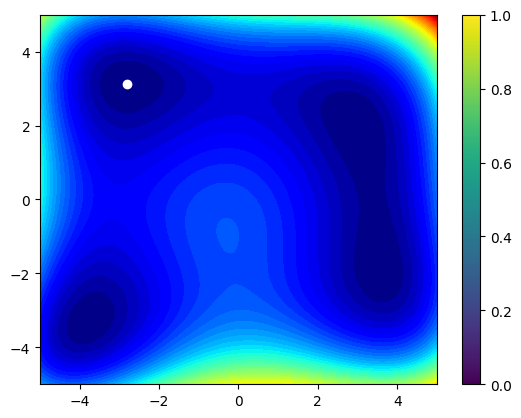

In [46]:
#Corremos el algoritmo
ga_instance.run()

#Extraemos la mejor solucion
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print(f"Parameters of the best solution : {solution}")
print(f"Fitness value of the best solution = {solution_fitness}")

prediction = objective_func(solution)
print(f"Valor optimo para la funcion: = {prediction}")

#Guardamos la solucion para la comparacion
xopAG, yopAG = solution
fevalAG = prediction

#Grafica de los contornos y punto optimo
plt.contourf(xv, yv, feval, levels=50, cmap='jet')
plt.scatter(xopAG, yopAG,c='white',marker='o')
plt.colorbar()
print(fevalAG)

### PSO: Optimizacion por enjambre de particulas
Para el algoritmo de PSO vamos a usar la libreria PySwarms. Similar a algoritmos geneticos, vamos a encontrar varias librerias con la implementacion de este algoritmo. Para conocer un poco mas de esta libreria pueden consultar el siguiente enlaceÑ [PySwarms](https://pyswarms.readthedocs.io/en/latest/).

In [47]:
#Instalamos la libreria
!pip install pyswarms

In [48]:
#Importamos la libreria
import pyswarms as ps

2025-03-01 12:16:53,176 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 2, 'c2': 2, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|500/500, best_cost=0.00133
2025-03-01 12:16:53,297 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0013295657841663096, best pos: [2.99894455 2.0093271 ]


Parameters of the best solution : [2.99894455 2.0093271 ]
Valor optimo para la funcion: = 0.0013295657841663096
0.0013295657841663096


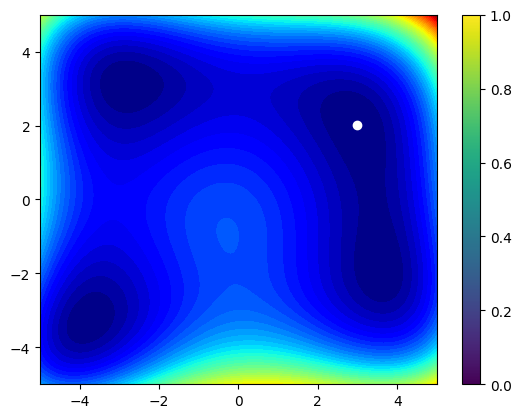

In [49]:
#Definicmos los hiperparametros
options = {'c1': 2, 'c2': 2, 'w':0.9}
#Valores max y min iniciales para las particulas
max_bound = 4*np.ones(2)
min_bound = - max_bound
bounds = (min_bound, max_bound)
#Instanciacion del optimizador
optimizer = ps.single.GlobalBestPSO(n_particles=20, dimensions=2, options=options, bounds=bounds)

#Ajuste de la funcion objetivo
#f(x,y)=(x^2+y-11)^2+(x+y^2-7)^2
def objective_func2(solution):
  term1 = (solution[:,0]**2+solution[:,1]-11)**2
  term2 = (solution[:,0]+solution[:,1]**2-7)**2
  return term1+term2

#Corremos el algoritmo PSO
cost, pos = optimizer.optimize(objective_func2, 500)

#Extraemos la mejor solucion
solution = optimizer.swarm.best_pos
print(f"Parameters of the best solution : {solution}")

prediction = objective_func(solution)
print(f"Valor optimo para la funcion: = {prediction}")

#Guardamos la solucion para la comparacion
xopPSO, yopPSO = solution
fevalPSO = prediction

#Grafica de los contornos y punto optimo
plt.contourf(xv, yv, feval, levels=50, cmap='jet')
plt.scatter(xopPSO, yopPSO,c='white',marker='o')
plt.colorbar()
print(fevalPSO)

### ACO: Colonia de hormigas

En este practica usaremos la librería mealpy, la cual incluye una gran variedad de métodos metaheurísticos. Implementados principalmente para realizar su comparación. La documentación completa de esta librería puede ser consultada en el siguiente [enlace](https://pypi.org/project/mealpy/#description).

ACOR.OriginalACOR corresponde a la implementación original de colonia de hormigas para funciones continuas. Los parámetros para definir en la [versión original](https://mealpy.readthedocs.io/en/latest/_modules/mealpy/swarm_based/ACOR.html?highlight=ACOR) son:

*   epoch: número de épocas
*   pop_size: tamaño de la población
*   sample_count: numero de nuevas muestras generadas

In [50]:
#Instalar libreria
!pip install mealpy

In [51]:
#Importar libreria
from mealpy import ACOR, FloatVar

In [52]:
#Configuracion del problema a traves de un diccionario
problem_dict = {
    "obj_func": objective_func,
    "bounds" : FloatVar(lb=[-4,-4], ub=[4,4]),
    "minmax" : "min"
}

In [54]:
#Optimizacion usando ACO
modelACO = ACOR.OriginalACOR(epoch=500, pop_size=20)
modelACO.solve(problem_dict)

2025-03-01 12:17:01,601 - mealpy.swarm_based.ACOR.OriginalACOR - INFO - Solving single objective optimization problem.


AttributeError: `ptp` was removed from the ndarray class in NumPy 2.0. Use np.ptp(arr, ...) instead.

GD:  [3.15544362e-30]
GA:  2.5020416667913315e-05
PSO:  0.0014317464640245905
ACO:  0.0


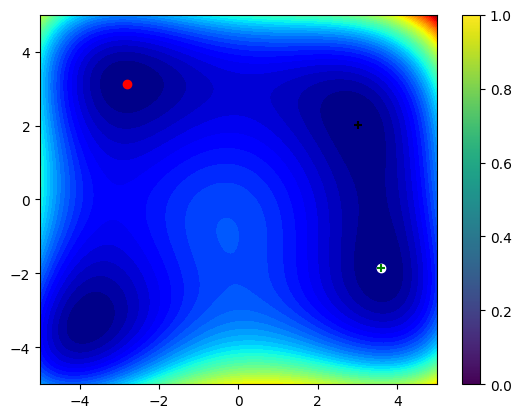

In [ ]:
#Guardamos la solucion para la comparacion
xopACO, yopACO = modelACO.g_best.solution
fevalACO = objective_func([xopACO,yopACO])

#Grafica de los contornos y punto optimo
plt.contourf(xv, yv, feval, levels=50, cmap='jet')
plt.scatter(xopGD, yopGD,c='white',marker='o')
plt.scatter(xopAG, yopAG,c='red',marker='o')
plt.scatter(xopPSO, yopPSO,c='black',marker='+')
plt.scatter(xopACO, yopACO,c='green',marker='+')
plt.colorbar()
print("GD: ",fevalGD)
print("GA: ",fevalAG)
print("PSO: ",fevalPSO)
print("ACO: ",fevalACO)